In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

C:\Users\Christian\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Christian\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Christian\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Christian\Anaconda3\envs\mlenv\lib\site-packages\ten

In [2]:
# Import input dataset
charity_df = pd.read_csv('charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop Name column since EIN can be used as identifier and is already numeric
charity_df = charity_df.drop(['NAME', 'EIN'], axis=1)
charity_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()
charity_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [5]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [6]:
# Display the classification value counts
class_counts = charity_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1283        1
C1900        1
C2600        1
C2190        1
C5200        1
Name: CLASSIFICATION, Length: 71, dtype: int64

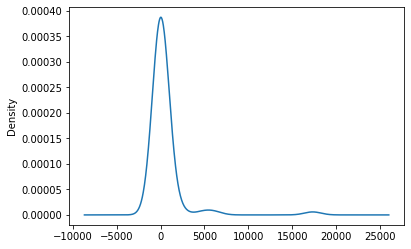

In [7]:
# Visualize the classification counts
class_counts.plot.density()

In [8]:
# Determine which values to replace
replace_class = list(class_counts[class_counts < 2500].index)

# Replace in DataFrame
for classification in replace_class:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(classification,"Other")


# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [9]:
# Display the application type counts
app_counts = charity_df.APPLICATION_TYPE.value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Determine which values to replace
replace_app = list(app_counts[app_counts < 1000].index)

# Replace in DataFrame
for app in replace_app:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(app,"Other")


# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            4
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(encode_df, left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat,1)
charity_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = charity_df["IS_SUCCESSFUL"].values
X = charity_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 78)

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

array([[ 0.01394306, -0.03348439, -0.26450123, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.26450123, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.26450123, ..., -0.06987849,
         0.02789425, -0.02789425],
       ...,
       [ 0.01394306, -0.03229417, -0.26450123, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.26450123, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.01093629, -0.26450123, ..., -0.06987849,
         0.02789425, -0.02789425]])

In [35]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 7

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 10)                390       
_________________________________________________________________
dense_30 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 8         
Total params: 475
Trainable params: 475
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
   32/25724 [..............................] - ETA: 1:08 - loss: 0.7427 - acc: 0.4688
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1024/25724 [>.............................] - ETA: 5s - loss: 0.6919 - acc: 0.5791  
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3072/25724 [==>...........................] - ETA: 1s - loss: 0.6742 - acc: 0.6169
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5120/25724 [====>.........................] - ETA: 1s - loss: 0.6532 - acc: 0.6432
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7168/25724 [=======>......................] - ETA: 0s - loss: 0.6420 - acc: 0.6576
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 9216/25724 [=========>....................] - 


Epoch 00004: saving model to checkpoints/weights.04.hdf5
 1792/25724 [=>............................] - ETA: 0s - loss: 0.5505 - acc: 0.7271
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 3712/25724 [===>..........................] - ETA: 0s - loss: 0.5563 - acc: 0.7249
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 5760/25724 [=====>........................] - ETA: 0s - loss: 0.5550 - acc: 0.7304
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 7808/25724 [========>.....................] - ETA: 0s - loss: 0.5564 - acc: 0.7303
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5602 - acc: 0.7281
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoc

 3552/25724 [===>..........................] - ETA: 0s - loss: 0.5636 - acc: 0.7269
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 5440/25724 [=====>........................] - ETA: 0s - loss: 0.5627 - acc: 0.7256
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 7424/25724 [=======>......................] - ETA: 0s - loss: 0.5603 - acc: 0.7291
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9472/25724 [==========>...................] - ETA: 0s - loss: 0.5656 - acc: 0.7253
Epoch 00007: saving model to checkpoints/weights.07.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5598 - acc: 0.7290
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 

 3936/25724 [===>..........................] - ETA: 0s - loss: 0.5534 - acc: 0.7368
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 5728/25724 [=====>........................] - ETA: 0s - loss: 0.5508 - acc: 0.7378
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 7552/25724 [=======>......................] - ETA: 0s - loss: 0.5556 - acc: 0.7325
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5557 - acc: 0.7324
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
11136/25724 [===========>..................] - ETA: 0s - loss: 0.5586 - acc: 0.7288
Epoch 00010: saving model to checkpoints/weights.10.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 

 3584/25724 [===>..........................] - ETA: 0s - loss: 0.5438 - acc: 0.7422
Epoch 00013: saving model to checkpoints/weights.13.hdf5
 5536/25724 [=====>........................] - ETA: 0s - loss: 0.5455 - acc: 0.7422
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 7328/25724 [=======>......................] - ETA: 0s - loss: 0.5509 - acc: 0.7377
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 9216/25724 [=========>....................] - ETA: 0s - loss: 0.5497 - acc: 0.7376
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
11008/25724 [===========>..................] - ETA: 0s - loss: 0.5473 - acc: 0.7402
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
12896/25724 [==============>...............] - ETA: 0s - loss: 

 3712/25724 [===>..........................] - ETA: 0s - loss: 0.5537 - acc: 0.7336
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 5568/25724 [=====>........................] - ETA: 0s - loss: 0.5540 - acc: 0.7331
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 7392/25724 [=======>......................] - ETA: 0s - loss: 0.5525 - acc: 0.7343
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5554 - acc: 0.7321
Epoch 00016: saving model to checkpoints/weights.16.hdf5
11296/25724 [============>.................] - ETA: 0s - loss: 0.5531 - acc: 0.7340
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
13120/25724 [==============>...............] - ETA: 0s - loss: 

 3840/25724 [===>..........................] - ETA: 0s - loss: 0.5558 - acc: 0.7289
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 5792/25724 [=====>........................] - ETA: 0s - loss: 0.5589 - acc: 0.7265
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 7488/25724 [=======>......................] - ETA: 0s - loss: 0.5528 - acc: 0.7300
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 9248/25724 [=========>....................] - ETA: 0s - loss: 0.5525 - acc: 0.7312
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
11008/25724 [===========>..................] - ETA: 0s - loss: 0.5550 - acc: 0.7311
Epoch 00019: saving model to checkpoints/weights.19.hdf5
12928/25724 [==============>...............] - ETA: 0s - loss: 0.5529 - acc: 0.7324
Epoch 00019: saving model to checkpoi

 3712/25724 [===>..........................] - ETA: 0s - loss: 0.5495 - acc: 0.7387
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 5504/25724 [=====>........................] - ETA: 0s - loss: 0.5458 - acc: 0.7409
Epoch 00022: saving model to checkpoints/weights.22.hdf5
 7424/25724 [=======>......................] - ETA: 0s - loss: 0.5532 - acc: 0.7340
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 9184/25724 [=========>....................] - ETA: 0s - loss: 0.5538 - acc: 0.7329
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
11008/25724 [===========>..................] - ETA: 0s - loss: 0.5594 - acc: 0.7275
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
12896/25724 [==============>...............] - ETA: 0s - loss: 

 3840/25724 [===>..........................] - ETA: 0s - loss: 0.5589 - acc: 0.7271
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 5696/25724 [=====>........................] - ETA: 0s - loss: 0.5523 - acc: 0.7319
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 7584/25724 [=======>......................] - ETA: 0s - loss: 0.5519 - acc: 0.7313
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5496 - acc: 0.7330
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
11264/25724 [============>.................] - ETA: 0s - loss: 0.5493 - acc: 0.7334
Epoch 00025: saving model to checkpoints/weights.25.hdf5
13280/25724 [==============>...............] - ETA: 0s - loss: 

 3712/25724 [===>..........................] - ETA: 0s - loss: 0.5526 - acc: 0.7411
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 5760/25724 [=====>........................] - ETA: 0s - loss: 0.5565 - acc: 0.7326
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 7776/25724 [========>.....................] - ETA: 0s - loss: 0.5558 - acc: 0.7310
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 9536/25724 [==========>...................] - ETA: 0s - loss: 0.5573 - acc: 0.7302
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5557 - acc: 0.7310
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
13248/25724 [==============>...............] - ETA: 0s - loss: 

 3776/25724 [===>..........................] - ETA: 0s - loss: 0.5609 - acc: 0.7240
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 5568/25724 [=====>........................] - ETA: 0s - loss: 0.5599 - acc: 0.7243
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 7424/25724 [=======>......................] - ETA: 0s - loss: 0.5519 - acc: 0.7310
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 9472/25724 [==========>...................] - ETA: 0s - loss: 0.5542 - acc: 0.7303
Epoch 00031: saving model to checkpoints/weights.31.hdf5
11488/25724 [============>.................] - ETA: 0s - loss: 0.5535 - acc: 0.7315
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
13440/25724 [==============>...............] - ETA: 0s - loss: 

 3968/25724 [===>..........................] - ETA: 0s - loss: 0.5440 - acc: 0.7414
Epoch 00034: saving model to checkpoints/weights.34.hdf5
 5920/25724 [=====>........................] - ETA: 0s - loss: 0.5460 - acc: 0.7378
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 7744/25724 [========>.....................] - ETA: 0s - loss: 0.5522 - acc: 0.7333
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 9568/25724 [==========>...................] - ETA: 0s - loss: 0.5515 - acc: 0.7339
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
11264/25724 [============>.................] - ETA: 0s - loss: 0.5533 - acc: 0.7315
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 

 3584/25724 [===>..........................] - ETA: 0s - loss: 0.5560 - acc: 0.7266
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 5632/25724 [=====>........................] - ETA: 0s - loss: 0.5527 - acc: 0.7290
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 7616/25724 [=======>......................] - ETA: 0s - loss: 0.5491 - acc: 0.7338
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5566 - acc: 0.7298
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
11136/25724 [===========>..................] - ETA: 0s - loss: 0.5540 - acc: 0.7315
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
12960/25724 [==============>...............] - ETA: 0s - loss: 

 5568/25724 [=====>........................] - ETA: 0s - loss: 0.5625 - acc: 0.7238
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 7392/25724 [=======>......................] - ETA: 0s - loss: 0.5594 - acc: 0.7261
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5571 - acc: 0.7275
Epoch 00040: saving model to checkpoints/weights.40.hdf5
11296/25724 [============>.................] - ETA: 0s - loss: 0.5529 - acc: 0.7317
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
13024/25724 [==============>...............] - ETA: 0s - loss: 0.5526 - acc: 0.7315
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
14752/25724 [================>.............] - ETA: 0s - loss: 

 5888/25724 [=====>........................] - ETA: 0s - loss: 0.5549 - acc: 0.7328
Epoch 00043: saving model to checkpoints/weights.43.hdf5
 7808/25724 [========>.....................] - ETA: 0s - loss: 0.5541 - acc: 0.7317
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 9568/25724 [==========>...................] - ETA: 0s - loss: 0.5536 - acc: 0.7321
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
11328/25724 [============>.................] - ETA: 0s - loss: 0.5529 - acc: 0.7337
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
13152/25724 [==============>...............] - ETA: 0s - loss: 0.5526 - acc: 0.7342
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 

 5568/25724 [=====>........................] - ETA: 0s - loss: 0.5548 - acc: 0.7292
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 7552/25724 [=======>......................] - ETA: 0s - loss: 0.5545 - acc: 0.7283
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 9600/25724 [==========>...................] - ETA: 0s - loss: 0.5534 - acc: 0.7301
Epoch 00046: saving model to checkpoints/weights.46.hdf5
11616/25724 [============>.................] - ETA: 0s - loss: 0.5530 - acc: 0.7311
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
13504/25724 [==============>...............] - ETA: 0s - loss: 0.5543 - acc: 0.7316
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
15328/25724 [================>.............] - ETA: 0s - loss: 

 5856/25724 [=====>........................] - ETA: 0s - loss: 0.5468 - acc: 0.7401
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 7776/25724 [========>.....................] - ETA: 0s - loss: 0.5510 - acc: 0.7355
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 9568/25724 [==========>...................] - ETA: 0s - loss: 0.5539 - acc: 0.7314
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
11296/25724 [============>.................] - ETA: 0s - loss: 0.5540 - acc: 0.7318
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
13312/25724 [==============>...............] - ETA: 0s - loss: 0.5528 - acc: 0.7327
Epoch 00049: saving model to checkpoints/weights.49.hdf5
15296/25724 [================>.............] - ETA: 0s - loss: 

 5760/25724 [=====>........................] - ETA: 0s - loss: 0.5530 - acc: 0.7319
Epoch 00052: saving model to checkpoints/weights.52.hdf5
 7744/25724 [========>.....................] - ETA: 0s - loss: 0.5512 - acc: 0.7318
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 9600/25724 [==========>...................] - ETA: 0s - loss: 0.5490 - acc: 0.7328
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
11456/25724 [============>.................] - ETA: 0s - loss: 0.5516 - acc: 0.7307
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
13216/25724 [==============>...............] - ETA: 0s - loss: 0.5516 - acc: 0.7295
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 

 7424/25724 [=======>......................] - ETA: 0s - loss: 0.5598 - acc: 0.7287
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 9472/25724 [==========>...................] - ETA: 0s - loss: 0.5524 - acc: 0.7335
Epoch 00055: saving model to checkpoints/weights.55.hdf5
11488/25724 [============>.................] - ETA: 0s - loss: 0.5519 - acc: 0.7344
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
13344/25724 [==============>...............] - ETA: 0s - loss: 0.5530 - acc: 0.7326
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
15168/25724 [================>.............] - ETA: 0s - loss: 0.5526 - acc: 0.7323
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 

 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5556 - acc: 0.7299
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
11136/25724 [===========>..................] - ETA: 0s - loss: 0.5549 - acc: 0.7302
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 0.5549 - acc: 0.7313
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5544 - acc: 0.7316
Epoch 00058: saving model to checkpoints/weights.58.hdf5
17184/25724 [===================>..........] - ETA: 0s - loss: 0.5541 - acc: 0.7314
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
19008/25724 [=====================>........] - ETA: 0s - loss: 

 9536/25724 [==========>...................] - ETA: 0s - loss: 0.5531 - acc: 0.7290
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
11264/25724 [============>.................] - ETA: 0s - loss: 0.5520 - acc: 0.7307
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 0.5531 - acc: 0.7309
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
14848/25724 [================>.............] - ETA: 0s - loss: 0.5512 - acc: 0.7325
Epoch 00061: saving model to checkpoints/weights.61.hdf5
16864/25724 [==================>...........] - ETA: 0s - loss: 0.5519 - acc: 0.7320
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
18720/25724 [====================>.........] - ETA: 0s - loss: 

 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5524 - acc: 0.7323
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5531 - acc: 0.7310
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
13440/25724 [==============>...............] - ETA: 0s - loss: 0.5554 - acc: 0.7280
Epoch 00064: saving model to checkpoints/weights.64.hdf5
15456/25724 [=================>............] - ETA: 0s - loss: 0.5530 - acc: 0.7305
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
17216/25724 [===================>..........] - ETA: 0s - loss: 0.5528 - acc: 0.7307
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 

 9472/25724 [==========>...................] - ETA: 0s - loss: 0.5525 - acc: 0.7329
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
11104/25724 [===========>..................] - ETA: 0s - loss: 0.5540 - acc: 0.7320
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 0.5542 - acc: 0.7314
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5508 - acc: 0.7343
Epoch 00067: saving model to checkpoints/weights.67.hdf5
17088/25724 [==================>...........] - ETA: 0s - loss: 0.5512 - acc: 0.7337
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
18976/25724 [=====================>........] - ETA: 0s - loss: 

 9376/25724 [=========>....................] - ETA: 0s - loss: 0.5485 - acc: 0.7365
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
11168/25724 [============>.................] - ETA: 0s - loss: 0.5488 - acc: 0.7353
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
13088/25724 [==============>...............] - ETA: 0s - loss: 0.5474 - acc: 0.7358
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
14880/25724 [================>.............] - ETA: 0s - loss: 0.5492 - acc: 0.7343
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5500 - acc: 0.7341
Epoch 00070: saving model to checkpoints/weights.70.hdf5
18752/25724 [====================>.........] - ETA: 0s - loss: 

 9632/25724 [==========>...................] - ETA: 0s - loss: 0.5534 - acc: 0.7313
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5554 - acc: 0.7303
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
13312/25724 [==============>...............] - ETA: 0s - loss: 0.5539 - acc: 0.7309
Epoch 00073: saving model to checkpoints/weights.73.hdf5
15296/25724 [================>.............] - ETA: 0s - loss: 0.5561 - acc: 0.7291
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
17120/25724 [==================>...........] - ETA: 0s - loss: 0.5563 - acc: 0.7303
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
18784/25724 [====================>.........] - ETA: 0s - loss: 